# Exploring with filtered CSV

## Simple barcharts

In [1]:
import matplotlib
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd
import nltk

In [20]:
rvDf = pd.read_csv('data/join_rv_gent.csv')
rvDf.head()

,id,date,reviewer_id,comments,listing_url,last_scraped,description,neighborhood_overview,host_id,latitude_left,...,location,longitude_right,name,name_1,set,slug,slug_1,sqmi,type,Score
0,27360,2010-02-22,8289,"Janet is such an incredible sweetheart. She is so accommodating and was able to work a last minute booking out with me. Her home is an adorable, fantastic classic home with beautiful architectural bones. It's a bit eclectic, funky, and fun, but very neat and homey. The room is spotless and no fuss, with a twin bed, desk, chair, rack for hanging your clothes, and quick wifi for your laptop. There is a great bathroom right next door that you have all to yourself. Just a few blocks from Sunset Junction and all the fun shops and restaurants in Silverlake. Great find and great price.",https://www.airbnb.com/rooms/19887,2021-02-10,"One block from Sqirl, the best new restaurant in Silverlake! ten minutes walk to Sunset Junction and all the shops on Sunset Boulevard in the heart of Silverlake. Cafecito Organico, the best coffee shop in Silverlake also one block away! Whole house water filter, which means the water everywhere in the house is purified to the highest quality water possible in California!<br /><br /><b>The space</b><br />Private bedroom with your own full bath in my charming 1920's house in Silverlake. Walking distance to Sunset Junction, tons of fun eateries and shops. Beautiful neighborhood, Farmer's market on Saturdays. The room has hardwood floors, a queen bed, rack for clothes and a desk and chair. Also the room has french doors that open up to the front deck and front yard. I live mostly upstairs, so there is alot of privacy. The room is on the first floor off of the kitchen. You will get your own bathroom right next to the room that is all yours. Any questions, please feel free to ema",NaN,75052,34.08517,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
1,29076,2010-03-11,89581,"Cosy and quite room. Wake up with the sun coming in through the curtains and open the doors to the veranda. Lovely neighborhood, you can walk down to Sunset and get the best coffee in town. Janet is a super sweet and helpful host. I will definitely recommend this charming spot to everyone.",https://www.airbnb.com/rooms/19887,2021-02-10,"One block from Sqirl, the best new restaurant in Silverlake! ten minutes walk to Sunset Junction and all the shops on Sunset Boulevard in the heart of Silverlake. Cafecito Organico, the best coffee shop in Silverlake also one block away! Whole house water filter, which means the water everywhere in the house is purified to the highest quality water possible in California!<br /><br /><b>The space</b><br />Private bedroom with your own full bath in my charming 1920's house in Silverlake. Walking distance to Sunset Junction, tons of fun eateries and shops. Beautiful neighborhood, Farmer's market on Saturdays. The room has hardwood floors, a queen bed, rack for clothes and a desk and chair. Also the room has french doors that open up to the front deck and front yard. I live mostly upstairs, so there is alot of privacy. The room is on the first floor off of the kitchen. You will get your own bathroom right next to the room that is all yours. Any questions, please feel free to ema",NaN,75052,34.08517,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
2,32586,2010-03-31,100054,"Janet is very accommodating, and the bedroom and bath she provides guests is neat and tidy and is more than sufficient for most budget travelers. Her residence is also a short distance from the shops, restaurants and general funkiness of Silverlake/Echo Park/Los Feliz. I wouldn't recommend staying at her place without a car, though. Silverlake/Echo Park/Los Feliz will likely never be what could be considered a good walking 

In [21]:
top_N = 20
newStopWords= ['<','>','/','br',',','.','b','/b','space','room','!','private','access','kitchen',')','guest','(','&','bedroom','house','apartment','home','bed','2','living','located','-','bathroom',"*",'one','\'s',':','full','la','note','1','large','\'','\‘','\’','\'m','—','los angeles', 'would', 'us']

In [22]:
def wordbarchart(txt):
    words = nltk.tokenize.word_tokenize(txt)
    word_dist = nltk.FreqDist(words)
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(newStopWords)
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                        columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    ax = rslt.plot.bar(color="deeppink", stacked=True)

<ipython-input-23-7cd30b60ca5c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = rvDf.comments.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')


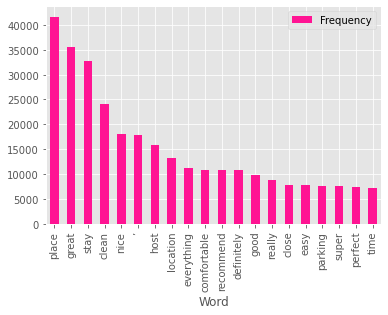

In [23]:
txt = rvDf.comments.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')    
wordbarchart(txt)

In [24]:
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)

In [25]:
rvDf[rvDf['comments'].str.contains('parking') == True]

,id,date,reviewer_id,comments,listing_url,last_scraped,description,neighborhood_overview,host_id,latitude_left,...,location,longitude_right,name,name_1,set,slug,slug_1,sqmi,type,Score
3,54442,2010-06-18,122427,"I stayed with Janet for 2 weeks and it was great! Since this was my first experience with airbnb, I really lucked out! The room was very neat, and having my own bathroom right next to the room was a great plus. There's lots of space (counter around the sink and top of built-in dresser) in the bathroom to spread out your toiletries. Bathtub/shower is nice. My favorite thing was probably the lightning-fast internet! I wish I had that at home!\r\n\r\nJust as she says, Janet spent most of her time upstairs when she was home, but I was gone a lot, and she was too. I wish we had had more time to get to know one another! I thought it might be a drawback not having a TV in the room, but I was on the go so much, I didn't really miss it! If you have your laptop, you can watch TV online!\r\n\r\nStreet parking can be difficult in the evenings, but Janet was very accomodating to work out a system. All in all, it was a very positive experience! I definitely look forward to staying with Janet again!",https://www.airbnb.com/rooms/19887,2021-02-10,"One block from Sqirl, the best new restaurant in Silverlake! ten minutes walk to Sunset Junction and all the shops on Sunset Boulevard in the heart of Silverlake. Cafecito Organico, the best coffee shop in Silverlake also one block away! Whole house water filter, which means the water everywhere in the house is purified to the highest quality water possible in California!<br /><br /><b>The space</b><br />Private bedroom with your own full bath in my charming 1920's house in Silverlake. Walking distance to Sunset Junction, tons of fun eateries and shops. Beautiful neighborhood, Farmer's market on Saturdays. The room has hardwood floors, a queen bed, rack for clothes and a desk and chair. Also the room has french doors that open up to the front deck and front yard. I live mostly upstairs, so there is alot of privacy. The room is on the first floor off of the kitchen. You will get your own bathroom right next to the room that is all yours. Any questions, please feel free to ema",NaN,75052,34.08517,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
20,190772,2011-03-01,365461,"Great big house in easy to find good part of Silverlake, walking distance from Sunset Junction, where there are cool vintage shops, coffee shops, health food stores and more. \r\nNice big room, with doors that open up to private patio and wonderful back yard with big bamboo blowing in the wind. Easy parking. Driveway not as steep as I was told, easy pezy. Warm and toasty for cold nights in LA (Central heat) and cool by day Easterly views/sun in AM mostly. Totally recommend it.",https://www.airbnb.com/rooms/19887,2021-02-10,"One block from Sqirl, the best new restaurant in Silverlake! ten minutes walk to Sunset Junction and all the shops on Sunset Boulevard in the heart of Silverlake. Cafecito Organico, the best coffee shop in Silverlake also one block away! Whole house water filter, which means the water everywhere in the house is purified to the highest quality water possible in California!<br /><br /><b>The space</b><br />Private bedroom with your own full bath in my charming 1920's house in Silverlake. Walking distance to Sunset Junction, tons of fun eateries and shops. Beautiful neighborhood, Farmer's market on Saturdays. The room has hardwood floors, a queen bed, rack for clothes and a desk and chair. Also the room has french doors that open up to the front deck and front yard. I live mostly upstairs, so there is alot of privacy. The room is on the first floor off of the kitchen. You will get your own bathroom right next to the room that is all yours. Any questions, please feel free to ema",NaN,75052,34.08517,...

'street parking can be difficult in the evening'   
'easy parking'   
'parking was the only problem'   
'limited parking'

In [26]:
type(txt)

str

## Topic Modeling

In [2]:
import matplotlib
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Shinah
[nltk_data]     Park\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Shinah
[nltk_data]     Park\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import re

In [4]:
rvDf = pd.read_csv('data/join_rv_gent.csv')
rvDf.head()

,id,date,reviewer_id,comments,listing_url,last_scraped,description,neighborhood_overview,host_id,latitude_left,...,location,longitude_right,name,name_1,set,slug,slug_1,sqmi,type,Score
0,27360,2010-02-22,8289,Janet is such an incredible sweetheart. She is...,https://www.airbnb.com/rooms/19887,2021-02-10,"One block from Sqirl, the best new restaurant ...",NaN,75052,34.08517,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
1,29076,2010-03-11,89581,Cosy and quite room. Wake up with the sun comi...,https://www.airbnb.com/rooms/19887,2021-02-10,"One block from Sqirl, the best new restaurant ...",NaN,75052,34.08517,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
2,32586,2010-03-31,100054,"Janet is very accommodating, and the bedroom a...",https://www.airbnb.com/rooms/19887,2021-02-10,"One block from Sqirl, the best new restaurant ...",NaN,75052,34.08517,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
3,54442,2010-06-18,122427,I stayed with Janet for 2 weeks and it was gre...,https://www.airbnb.com/rooms/19887,2021-02-10,"One block from Sqirl, the best new restaurant ...",NaN,75052,34.08517,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
4,58138,2010-06-27,67499,Janet has the best clothing is super friendly ...,https://www.airbnb.com/rooms/19887,2021-02-10,"One block from Sqirl, the best new restaurant ...",NaN,75052,34.08517,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0


In [ ]:
def clean_string(text):
    
    # convert to lower case to catch weird capitalization issues
    text = text.lower()
    # replace whitespace
    text = re.sub(r"\s+", " ", text)
    # remove punctuation
    text_wordsonly = re.sub(r"[^A-z\s]", "", text)
    # remove whitespace again
    text_wordsonly = re.sub(r"\s+", " ", text_wordsonly)
    # split the words into a list and tokenize
    wordlist = text_wordsonly.split()
    # wordlist = word_tokenize(text_wordsonly)

    # https://stackoverflow.com/questions/5511708/adding-words-to-nltk-stoplist
    # https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

    # define the stop words and add our custom ones
    stop_words = nltk.corpus.stopwords.words('english')
    newStopWords = ['hollywood','la','los','br','nan','space','room','private','access','kitchen','guest','bedroom','one','living','located','full','large','los angeles','neighborhood', 'miles', 'away', 'minutes', 'distance', 'area', 'city', 'street', 'studios', 'many', 'universal', 'within', 'angeles', 'milder', 'also', 'close', 'north', 'min','downtown','milesbr','around','lots','blvd','santa','monica','inglewood','burbank','spacebbr','theb','bthe','bguest']
    stop_words.extend(newStopWords)
 
    # filter out the stop words and add them to a new list called filtered_words
    filtered_words = [w for w in wordlist if not w in stop_words] 
    filtered_words = [] 
    for w in wordlist: 
        if w not in stop_words: 
               filtered_words.append(w) 
                
    # assign the new filtered word list to our cleaned list 
    cleaned_list_of_words = filtered_words
    return cleaned_list_of_words

In [23]:
def clean_string(rv):
    # your code here
    com = re.sub(r"\s+", " ", rv)  
    com_wordsonly = re.sub(r"[^A-z\s]", "", com)
    com_wordsonly = re.sub(r"\s+", " ", com_wordsonly)
    #list_of_words = com_wordsonly.split()
    list_of_words = word_tokenize(com_wordsonly.lower())
    swords = [re.sub(r"[^A-z\s]", "", sword) for sword in stopwords.words('english')]
    swords.append('host')
    swords.append('home')
    swords.append('room')
    swords.append('bathroom')
    swords.append('day')
    swords.append('place')
    swords.append('time')
    swords.append('would')
    swords.append('la')
    swords.append('us')
    swords.append('bed')
    swords.append('house')
    swords.append('also')
    swords.append('los')
    swords.append('angeles')
    swords.append('airbnb')
    swords.append('area')
    swords.append('one')
    swords.append('really')
    swords.append('thank')
    swords.append('recommend')
    swords.append('get')
    swords.append('check')
    
    
    cleaned_list_of_words = [word for word in list_of_words if word not in swords and len(word)>2]
    
    return cleaned_list_of_words

## Checking

In [24]:
reviews = rvDf.comments.astype(str)

In [25]:
type(reviews)

pandas.core.series.Series

In [26]:
clean_reviews = [clean_string(i) for i in reviews]; clean_reviews

clean_reviews = list(filter(None, clean_reviews))

In [27]:
clean_reviews

[['janet',
  'incredible',
  'sweetheart',
  'accommodating',
  'able',
  'work',
  'last',
  'minute',
  'booking',
  'adorable',
  'fantastic',
  'classic',
  'beautiful',
  'architectural',
  'bones',
  'bit',
  'eclectic',
  'funky',
  'fun',
  'neat',
  'homey',
  'spotless',
  'fuss',
  'twin',
  'desk',
  'chair',
  'rack',
  'hanging',
  'clothes',
  'quick',
  'wifi',
  'laptop',
  'great',
  'right',
  'next',
  'door',
  'blocks',
  'sunset',
  'junction',
  'fun',
  'shops',
  'restaurants',
  'silverlake',
  'great',
  'find',
  'great',
  'price'],
 ['cosy',
  'quite',
  'wake',
  'sun',
  'coming',
  'curtains',
  'open',
  'doors',
  'veranda',
  'lovely',
  'neighborhood',
  'walk',
  'sunset',
  'best',
  'coffee',
  'town',
  'janet',
  'super',
  'sweet',
  'helpful',
  'definitely',
  'charming',
  'spot',
  'everyone'],
 ['janet',
  'accommodating',
  'bedroom',
  'bath',
  'provides',
  'guests',
  'neat',
  'tidy',
  'sufficient',
  'budget',
  'travelers',
  'r

In [28]:
import gensim
import pyLDAvis
import pyLDAvis.gensim_models 

Note that there are lots of options. The most important are:
* `corpus`: the text. More on the format for this below
* `num_topics`: how many topics you want to identify
* `alpha`: the expected distribution of topics across documents (i.e., are topics concentrated in a few documents)
* `eta`:  (sometimes called `beta`): the expected distribution of words across topics (i.e., are words concentrated in a few topics) 

In [29]:
dictionary = gensim.corpora.Dictionary(clean_reviews)
corpus = [dictionary.doc2bow(wl) for wl in clean_reviews]
model = gensim.models.LdaMulticore(corpus, id2word=dictionary, num_topics=5, alpha = .01, eta=.01)

In [30]:
#model.show_topic(0)

In [31]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.002685  0.020165       1        1  24.860619
0     -0.050879 -0.013621       2        1  20.014303
3      0.004566  0.023294       3        1  19.382828
1      0.030477 -0.026616       4        1  17.970558
4      0.013151 -0.003221       5        1  17.771692, topic_info=           Term          Freq         Total Category  logprob  loglift
134        nice  17516.000000  17516.000000  Default  30.0000  30.0000
80         good   9159.000000   9159.000000  Default  29.0000  29.0000
20        great  34252.000000  34252.000000  Default  28.0000  28.0000
167       quiet   7167.000000   7167.000000  Default  27.0000  27.0000
260  everything  11178.000000  11178.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
167       quiet   1134.237782   7167.692679   Topic5  -5.2668  -0.1161
530        like   1054.924437   6338.644915   Topic5  -5.3393  -0.0656
50   definitely   1291.400854  10483.242619   Topic5  -5.1370  -0.3665
60        super   1085.400618   7185.291509   Topic5  -5.3108  -0.1625
196     perfect    962.793411   7635.127818   Topic5  -5.4307  -0.3431

[472 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
10569      2  0.917967   accommodatie
1          1  0.348344  accommodating
1          2  0.127012  accommodating
1          3  0.197282  accommodating
1          4  0.130770  accommodating
...      ...       ...            ...
211        4  0.261898      wonderful
211        5  0.206267      wonderful
18457      3  0.908449     wonderland
9711       4  0.988786            wth
20028      1  1.126876          youth

[950 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2, 5])

## Counting up specific keywords

In [39]:
# convert to string and lower case
rvDf['comments']=rvDf.comments.astype(str)
rvDf['neighborhood_overview']=rvDf.comments.str.lower()

# convert to string and lower case
#df_all['neighborhood_overview']=df_all.neighborhood_overview.astype(str)
#df_all['neighborhood_overview']=df_all.neighborhood_overview.str.lower()

In [40]:
def check_words(description, word):
    if word in description:
        n = True
    else:
        n = False
    return n

In [47]:
# need to redefine keywords below.. 

In [41]:
# iterate over a list of keywords
list = ['restaurants', 'coffee', 'art', 'bars', 'shops','safe', 'quiet', 'authentic', 'eclectic', 'up and coming','walk', 'parking', 'drive', 'train', 'bike']
  
# getting length of list
length = len(list)

In [43]:
# Iterating the index to add them to the filtered df
for i in range(length):
    rvDf[list[i]]=rvDf.comments.apply(lambda x: check_words(x,list[i]))
    #df_all[list[i]]=df_all.neighborhood_overview.apply(lambda x: check_words(x,list[i]))

In [44]:
def keyword_chart(dataframe,keyword):
    groupDF = dataframe.groupby('neighbourhood_cleansed')[keyword].mean()
    ax = groupDF.plot.bar(stacked=True, figsize=(10,12))
    ax.set_ylabel('Percent of Listings', fontsize=10)
    ax.set_xlabel('Neighborhood', fontsize=10)
    ax.set_title('Listings With The Word '+keyword.title()+ ' by Neighborhood', fontsize=16)
    ax.set_ylim(0,1)

In [46]:
rvDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76026 entries, 0 to 76025
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     76026 non-null  int64  
 1   date                   76026 non-null  object 
 2   reviewer_id            76026 non-null  int64  
 3   comments               76026 non-null  object 
 4   listing_url            76026 non-null  object 
 5   last_scraped           76026 non-null  object 
 6   description            75415 non-null  object 
 7   neighborhood_overview  76026 non-null  object 
 8   host_id                76026 non-null  int64  
 9   latitude_left          76026 non-null  float64
 10  longitude_left         76026 non-null  float64
 11  geometry               76026 non-null  object 
 12  index_right            76026 non-null  int64  
 13  display_na             76026 non-null  object 
 14  external_i             76026 non-null  object 
 15  ki

In [ ]:
neighbourhood_cleansed

In [45]:
keyword_chart(rvDf,'safe')

KeyError: 'neighbourhood_cleansed'

In [ ]:
# I have to rejoing the two csvs to include 'neighbourhood_cleansed' column in rvDf.

**--------------------------------no need to read below-------------**

In [9]:
#df['sqft'] = df.housingsize.apply(extract_sqft)
cleaned = rvDf.comments.apply(clean_string)

TypeError: expected string or bytes-like object

In [12]:
###swords = [re.sub(r"[^A-z\s]", "", sword) for sword in stopwords.words('english')]

# we did this in two steps before, but it's simpler to avoid creating the intermediate list of words

# this is a nested list comprehension. In the outer list, we loop over CAPs
# in the inner list, we loop over words in that CAP
###wordlists = [word for word in word_tokenize(txt.lower()) if word not in swords]

# wordlists = []
# for cap in caps:
   # wl2 = []
   # wl = word_tokenize(cap.lower())
   # for word in wl:
       # if word not in swords:
           # wl2.append(word)
   # wordlists.append(wl2)

#print(wordlists[0][10000:10050])
#print(wordlists[1][10000:10050])

NameError: name 'txt' is not defined

In [17]:
import gensim
help(gensim.models.LdaMulticore)

Help on class LdaMulticore in module gensim.models.ldamulticore:

class LdaMulticore(gensim.models.ldamodel.LdaModel)
 |  LdaMulticore(corpus=None, num_topics=100, id2word=None, workers=None, chunksize=2000, passes=1, batch=False, alpha='symmetric', eta=None, decay=0.5, offset=1.0, eval_every=10, iterations=50, gamma_threshold=0.001, random_state=None, minimum_probability=0.01, minimum_phi_value=0.01, per_word_topics=False, dtype=<class 'numpy.float32'>)
 |  
 |  An optimized implementation of the LDA algorithm, able to harness the power of multicore CPUs.
 |  Follows the similar API as the parent class :class:`~gensim.models.ldamodel.LdaModel`.
 |  
 |  Method resolution order:
 |      LdaMulticore
 |      gensim.models.ldamodel.LdaModel
 |      gensim.interfaces.TransformationABC
 |      gensim.utils.SaveLoad
 |      gensim.models.basemodel.BaseTopicModel
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, corpus=None, num_topics=100, id2word=None, workers=

In [18]:
dictionary = gensim.corpora.Dictionary(wordlists)
corpus = [dictionary.doc2bow(wl) for wl in wordlists]
model = gensim.models.LdaMulticore(corpus, id2word=dictionary, num_topics=10, alpha = 0.9, eta=0.9)

TypeError: doc2bow expects an array of unicode tokens on input, not a single string